<a href="https://colab.research.google.com/github/aarna97pandey/TextRecognition/blob/master/RecognitionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connecting the notebook to the Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Import the gdrive
from google.colab import drive
from google.colab import files

In [0]:
#Libraries for preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import six.moves.urllib as urllib
from PIL import Image
import numpy as np
import csv
import cv2
import glob
import os
import sys
from xml.etree import ElementTree
from xml.dom import minidom

In [0]:
path = '/content/gdrive/My Drive/assignment/TL/'
XMLSET = {}
for file in glob.glob(path + '/*.xml'):
    tree = ElementTree.parse(file)
    root = tree.getroot()
    filename = root.find("filename").text
    XMLSET[filename] = {}
    for obj in root.findall('object'):   
        name = obj.find("name").text
        XMLSET[filename][name] = []
        dimension = obj.find("bndbox")
        for dim in dimension:
            XMLSET[filename][name].append(int(dim.text))

In [5]:
print(XMLSET)

{'1055.jpeg': {'N': [18, 24, 42, 56], '1': [440, 23, 458, 56], '2': [59, 24, 80, 55], '°': [360, 19, 374, 35], '5': [520, 24, 541, 58], '6': [120, 23, 141, 56], "'": [419, 17, 432, 37], '0': [180, 21, 201, 57], '.': [481, 45, 490, 60], '7': [321, 24, 339, 57], '"': [541, 18, 560, 36], 'E': [298, 24, 321, 57], '9': [341, 24, 360, 57], '3': [400, 23, 420, 58], '4': [458, 21, 481, 59], '8': [500, 24, 520, 58]}, '113000.jpeg': {'N': [20, 25, 40, 55], '1': [383, 25, 397, 55], '2': [462, 23, 479, 54], '°': [361, 21, 372, 33], '5': [242, 24, 260, 55], '4': [521, 24, 540, 55], "'": [421, 19, 430, 33], '6': [182, 25, 200, 56], '.': [483, 48, 489, 55], '8': [401, 25, 419, 54], '"': [543, 19, 557, 34], 'E': [300, 25, 320, 54], '7': [322, 24, 339, 56], '9': [342, 24, 359, 56], '3': [441, 23, 459, 55], '0': [501, 24, 519, 54]}, '150.jpeg': {'N': [19, 25, 42, 57], '1': [382, 24, 399, 57], '2': [61, 23, 79, 57], '°': [360, 19, 374, 37], '5': [160, 23, 180, 59], '6': [480, 23, 501, 58], "'": [420, 18,

In [0]:
def resize(img):
  h,w = cropped.shape
  if(h>w):
    h_ = 32
    w_ = int(32*w/h)
  else:
    h_ = int(32*h/w)
    w_ = 32
  img = cv2.resize(cropped,(w_,h_), interpolation = cv2.INTER_AREA)
  left = int((32-w_)/2)
  top =  int((32-h_)/2)
  right = 32-left-w_
  bottom = 32-top-h_
  img = cv2.copyMakeBorder(img, top, bottom, left,right,cv2.BORDER_CONSTANT)
  return img
    

In [0]:
XTRAIN = []
YTRAIN = []
dim = (32,32)
for filename in XMLSET:
  filepath = path+filename
  img= cv2.imread(filepath,0)
  img = np.asarray(img)
  for name in XMLSET[filename]:
    xmin = XMLSET[filename][name][0]
    ymin = XMLSET[filename][name][1]
    xmax = XMLSET[filename][name][2] 
    ymax = XMLSET[filename][name][3]
    cropped = img[ymin:ymax,xmin:xmax]
    resized = resize(cropped)
    XTRAIN.append(resized)
    YTRAIN.append(name)  

°


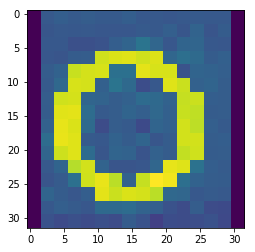

In [8]:
plt.imshow(XTRAIN[3])
print(YTRAIN[3])

'
1901
32
32


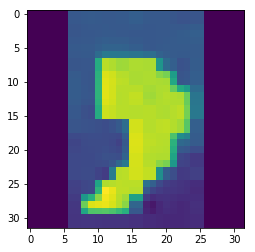

In [9]:
plt.imshow(XTRAIN[22])
print(YTRAIN[22])
print(len(YTRAIN))
print(len(XTRAIN[0]))
print(len(XTRAIN[0][0]))

In [10]:
print(YTRAIN)

['N', '1', '2', '°', '5', '6', "'", '0', '.', '7', '"', 'E', '9', '3', '4', '8', 'N', '1', '2', '°', '5', '4', "'", '6', '.', '8', '"', 'E', '7', '9', '3', '0', 'N', '1', '2', '°', '5', '6', "'", '.', '3', '9', '"', 'E', '7', '8', 'N', '1', '2', '°', '5', '4', "'", '.', '"', 'E', '7', '9', '8', '0', 'N', '1', '2', '°', '5', '4', "'", '8', '.', '6', '3', '"', 'E', '7', '9', 'N', '1', '2', '°', '5', '4', "'", '6', '.', '9', '"', 'E', '7', '8', '3', 'N', '1', '2', '°', '5', '6', "'", '0', '.', '9', '"', 'E', '7', '3', '4', 'N', '1', '2', '°', '5', '4', "'", '.', '"', 'E', '7', '9', '8', '0', 'N', '1', '2', '°', '5', '6', "'", '0', '.', '9', '"', 'E', '7', '3', '4', 'N', '1', '2', '°', '5', '6', "'", '0', '.', '7', '"', 'E', '9', '3', '4', '8', 'N', '1', '2', '°', '5', '6', "'", '.', '4', '"', 'E', '7', '9', '3', '8', 'N', '1', '2', '°', '5', '6', "'", '8', '"', 'E', '7', '9', '3', '.', '4', 'N', '1', '2', '°', '5', '4', "'", '.', '6', '"', 'E', '7', '9', '8', 'N', '1', '2', '°', '5', '6',

In [11]:
print(XTRAIN[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
#BATCH SIZE AND EPOCHS
BatchSize = 75
Epochs = 20
num_classes = 16
input_shape=(32,32,1)
data_augmentation = True



In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
x_train = np.array(XTRAIN)
y_train = np.array(YTRAIN)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split( x_train, y_train, test_size=0.25, random_state=4)
print(x_train.shape)
print(x_test.shape)

(1425, 32, 32)
(476, 32, 32)


In [17]:
img_cols,img_rows=32,32
if K.image_data_format()=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1,img_cols,img_rows)
    x_test = x_test.reshape(x_test.shape[0], 1,img_cols,img_rows)
    input_shape = (1,img_cols,img_rows)
else:
    x_train = x_train.reshape(x_train.shape[0],img_cols,img_rows,1)
    x_test = x_test.reshape(x_test.shape[0],img_cols,img_rows,1)
    input_shape = (img_cols,img_rows,1)
    
    
print(K.image_data_format())

channels_first


In [0]:
y_train= y_train.reshape(len(y_train),1)
y_test= y_test.reshape(len(y_test),1)


In [19]:
#CONVERT LABEL ARRAY TO BINARY MATRIX OF CLASSES
from sklearn.preprocessing import MultiLabelBinarizer
Binerizer = MultiLabelBinarizer()
y_train=Binerizer.fit_transform(y_train)
y_test=Binerizer.fit(y_test)
print(y_train)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [20]:
print(x_train.shape)
##print(y_train.shape)
print(x_test.shape)
##print(y_test.shape)

(1425, 1, 32, 32)
(476, 1, 32, 32)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape = input_shape, activation = 'relu')) #no need to ad padding as our image is centralized
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    
    model.add(Flatten()) # to convert 6*6*15 to 1D array
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [23]:
model = model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 28, 28)        1560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 12, 12)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 10, 10)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [24]:
# FIT AND TRAIN
model.fit(x = x_train, y = y_train, 
          validation_split=0.1, 
          batch_size = BatchSize, 
          verbose=2, 
          epochs=Epochs,
          shuffle = True )

Instructions for updating:
Use tf.cast instead.
Train on 1282 samples, validate on 143 samples
Epoch 1/20
 - 4s - loss: 13.8522 - acc: 0.0952 - val_loss: 13.1766 - val_acc: 0.1049
Epoch 2/20
 - 4s - loss: 10.5665 - acc: 0.1817 - val_loss: 2.4391 - val_acc: 0.2937
Epoch 3/20
 - 4s - loss: 2.7264 - acc: 0.1217 - val_loss: 2.3450 - val_acc: 0.4266
Epoch 4/20
 - 4s - loss: 2.1652 - acc: 0.3097 - val_loss: 1.0240 - val_acc: 0.8392
Epoch 5/20
 - 4s - loss: 1.5875 - acc: 0.5031 - val_loss: 0.6094 - val_acc: 0.9161
Epoch 6/20
 - 4s - loss: 1.2831 - acc: 0.6061 - val_loss: 0.3484 - val_acc: 0.9441
Epoch 7/20
 - 4s - loss: 1.0667 - acc: 0.6708 - val_loss: 0.3194 - val_acc: 0.9441
Epoch 8/20
 - 4s - loss: 0.8701 - acc: 0.7215 - val_loss: 0.3154 - val_acc: 0.9371
Epoch 9/20
 - 4s - loss: 0.7335 - acc: 0.7543 - val_loss: 0.1703 - val_acc: 0.9580
Epoch 10/20
 - 4s - loss: 0.5827 - acc: 0.8073 - val_loss: 0.1538 - val_acc: 0.9790
Epoch 11/20
 - 4s - loss: 0.5639 - acc: 0.8120 - val_loss: 0.1595 - val

In [0]:
model.save('/content/gdrive/My Drive/assignment/Recognition_model.h5')

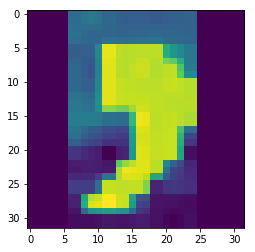

In [26]:
plt.imshow(x_train[29].reshape(32,32))


In [27]:
Predictions = model.predict(x_train[29:30])
print(Predictions)

[[8.1428038e-09 9.9999976e-01 6.6769458e-11 8.9488920e-12 5.1809751e-10
  1.6800655e-08 1.6342636e-10 1.2502141e-10 3.5947686e-08 1.7459164e-11
  1.0459312e-09 1.2170671e-10 2.4131660e-07 1.7528250e-09 3.2348207e-10
  1.6845535e-09]]


In [28]:
for a in Predictions:
  max_ = 0
  for i in range(1,16):
    if(a[max_]<a[i]):
      max_ = i
  for i in range(0,16):
    if(max_ == i):
      a[i] = int(1)
    else:
      a[i] = int(0)
    
print(Predictions)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
predictions = Binerizer.inverse_transform(Predictions)
#LIST OF STRING FROM INTEGER LIST
print(predictions)

[("'",)]


#predict


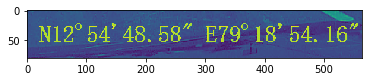

In [30]:
img =  cv2.imread(path+'427500.jpeg',0)
org_img = cv2.imread(path+'427500.jpeg',0)
plt.imshow(img)

In [0]:
height, width = img.shape[:2]
img = cv2.resize(img,(3*width,height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)
org_img = cv2.resize(org_img,(3*width,height), interpolation = cv2.INTER_CUBIC)

(80, 1692)

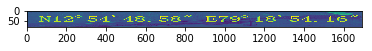

In [32]:
plt.imshow(img)
img.shape

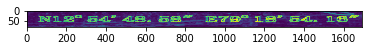

In [33]:
kernel = np.ones((6,6),np.uint8)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(img_grad)

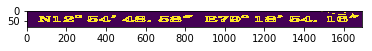

In [34]:
_,img_bin = cv2.threshold(img_grad,0,255,cv2.THRESH_OTSU)
plt.imshow(img_bin)

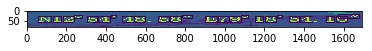

In [35]:
_,contours,hierarchy = cv2.findContours(img_bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#contours = sorted(contours,key=lambda x: x[0])
imgs = []
bound = []
for i in range(hierarchy.shape[1]):
    x,y,w,h = cv2.boundingRect(contours[i])
    bound.append([x,y,w,h])
bound = sorted(bound,key=lambda x: x[0])
for i in range(len(bound)):    
    #print(x,y,w,h,contours[i])
    x,y,w,h = bound[i]
    if(not (h < 15 or w < 15)):
        count = cv2.countNonZero(img_bin[y:y+h,x:x+w])
        r = count/(w*h)
        #if (r>0.25):
        cropped = org_img[y:y+h,x:x+w]
        imgs.append(cropped)
        cv2.rectangle(img,(x, y), (x+w, y+h), (0,0 ,255), 3);
plt.imshow(img)      


In [0]:
img = cv2.resize(img,(width,height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)
org_img = cv2.resize(org_img,(width,height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)

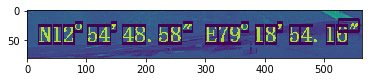

In [37]:
plt.imshow(img)      


In [38]:
len(imgs)

24

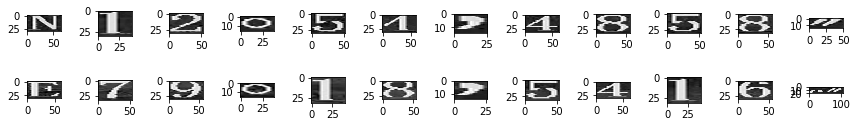

In [39]:
fig, axs = plt.subplots(nrows=2, ncols = 12, figsize=(12, 2))
fig.tight_layout()
for j in range(12):
    axs[0][j].imshow(imgs[j], cmap=plt.get_cmap("gray"))
for j in range(12):
    axs[1][j].imshow(imgs[12+j], cmap=plt.get_cmap("gray"))


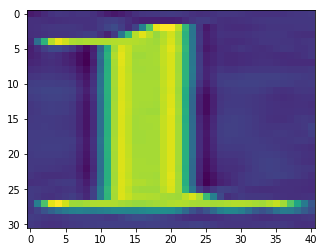

In [40]:
plt.imshow(imgs[1])

In [0]:
resized = resize(imgs[1])

In [43]:
print(resized)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
resized = resized.reshape(1,1,32,32)

In [45]:
print(resized)

[[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]]


In [46]:
Predictions = model.predict(resized)
print(Predictions)

[[9.9825138e-01 1.9603444e-06 1.3294736e-04 5.4070017e-05 1.7932587e-08
  2.0495721e-08 5.2173372e-09 2.3637327e-07 2.3230565e-04 6.9489273e-05
  5.5514356e-08 1.5434832e-06 1.0144913e-03 7.3625815e-05 1.1958782e-07
  1.6766740e-04]]


In [47]:
for a in Predictions:
  max_ = 0
  for i in range(1,16):
    if(a[max_]<a[i]):
      max_ = i
  for i in range(0,16):
    if(max_ == i):
      a[i] = int(1)
    else:
      a[i] = int(0)
    
print(Predictions)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
Predictions = Binerizer.inverse_transform(Predictions)
print(Predictions)